# Lab 3
## Problem 1
### A)
>We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

With no signal, we expect the background distribution to be Gaussian with a mean of 12 K and a standard deviation of 0.4 K. In order to remove anomalies from the meta-data, we ask: at what significance will we see the least amount of data data being included in the background distribution?

By looking at the bad data, we can construct integrals depending on whether it is below or above the mean.

For data below the mean, we integrate from neg infinity to a value x.
$$\int^t_{-\infty} \frac{1}{\sqrt{2\pi}}e^{-x^2/2} dx < 0.3%$$

For data above the mean, we integrate from a value x to pos infinity.
$$\int^{\infty}_t \frac{1}{\sqrt{2\pi}}e^{-x^2/2} dx < 0.3$$

Good Data
Mean:  11.999487167518359
SD:  0.3999206423351455
Range:  10.36868030396813 13.63284753399771

-------------------

below mean:  -5.000000000000001
below mean:  -4.249999999999997
below mean:  -24.750000000000004
below mean:  -30.0
below mean:  -30.0
above mean:  inf
above mean:  inf
above mean:  1.7499999999999984

-------------------

Sigma:  1 [68228, 31772]
Sigma:  3 [99740, 260]
Sigma:  5 [100000, 0]


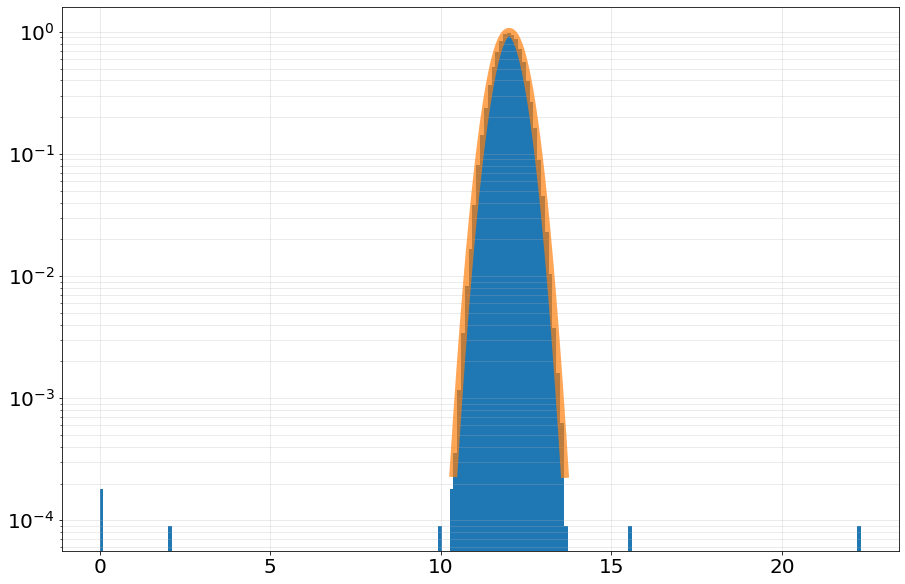

In [300]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal

fig1, ax1 = plt.subplots(1, 1, figsize=(15,10))
good = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(good, bad)
ax1.hist(d,200, density=True)
ax1.tick_params(labelsize = 20)
ax1.set_yscale('log')

print("Good Data")
mean = np.mean(good)
print("Mean: ", mean)
std = np.std(good)
print("SD: ", std)
print("Range: ", np.amin(good), np.amax(good))

x = np.linspace(np.amin(good), np.amax(good), 1000)
ax1.plot(x, stats.norm.pdf(x, 12., 0.4),linewidth = 8,alpha = 0.7)
ax1.grid(True, 'both', alpha=0.3)

print("\n-------------------\n")
        
for n in bad:
    if (n < 12.):
        print("below mean: ", stats.norm.ppf(stats.norm.cdf(n, loc=12., scale=0.4)))
    else:
        print("above mean: ", stats.norm.ppf(stats.norm.cdf(n, loc=12., scale=0.4)))

print("\n-------------------\n")

for i in [1,3,5]:
    bad_count = 0
    good_count = 0
    for n in good:
        if abs(n - mean) > i*std:
            bad_count += 1
        else:
            good_count += 1        
    print("Sigma: ", i, [good_count, bad_count])
    
plt.show()

Looking at the bad data, we can assume data greater than 3 standard deviations away from the mean is a fault of the thermometry and within 3-sigma a fault of the thermal control system. The reasoning is that a faulty thermal control system would not cause the temperature to vary to drastically and so data greater than 3 standard deviations away are thermometry errors.

<div align='center'>Threshold of 1-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   68332   |   32688  |
| Bad Measure  |     8     |     0    |

&nbsp;

<div align='center'>Threshold of 3-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   99730   |    270   |
| Bad Measure  |     7     |     1    |

&nbsp;

<div align='center'>Threshold of 5-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   100000  |     0    |
| Bad Measure  |     6     |     2    |

### B)

In choosing 3$\sigma$ as the statistical threshold, the number of omissions contributes about 0.3% of all data and is a predicatble quantity following the empirical rule.

### C)

There is bad data being included with both thermal control system and thermometry errors which can be avoided by tightening the statistical threshold to within 3-sigma, specifically to 1.74 to eliminate all the specified bad data points.

## Problem 2
- what value are you really interested in?
- what distribution describes that value?

- the difference between pictures of an asteroid
- given a (delta x, delta y), this is the uncertainty of the center of the object
- if a star appears to have not moved, how unsure is its center 

- find a range of x and y values such that we know that there is movement, likely in the center

- for where we know there is movement(5 sigma), find the x,y

- a star would have had to move this sqrt(x,y) distance to be significant(5-sigma)

### 1.

Given a plot of 2D uncertainty in position, an rms(average magnitude) of 1, and Gaussian distributions, what distance in arcseconds would give us a significance of 5-sigma? Relating this question to the plot, at what (x,y) values does the uncertainty become low enough such that we get a 5-sigma detection?

### 2.

Integrate the with a two-tail measurement of individual x and y distributions to get probabilities. Then get the magnitude of probabilities and convert to a significance. Except we know the significance and we want x and y.

$$P(x,y) = \int\int pdf()$$

### 3.

1.0010833056908968 1.0051917336886735

----------------

0.749999437815049 0.25
5.003774546809661
Minimum distance at for 5-sigma: x = y = 0.54495155


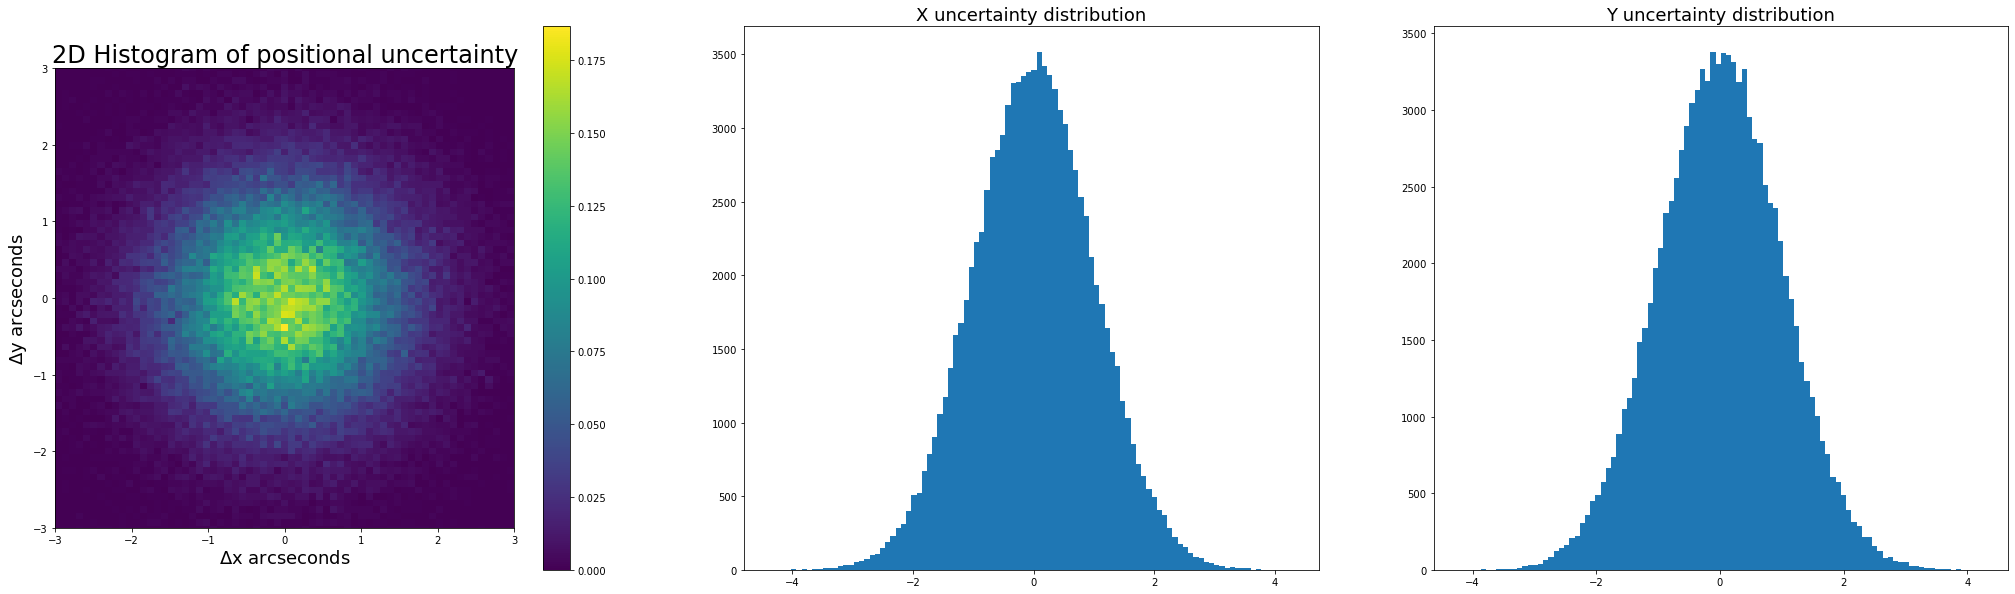

In [301]:
x_std = np.std(stats.norm.rvs( loc = 1, size = 100000))
y_std = np.std(stats.norm.rvs( loc = 1, size = 100000))
print(x_std,y_std)
# print(stats.pearsonr(x_std,y_std))
x = stats.norm.rvs( scale = 1, size = 100000)
y = stats.norm.rvs( scale = 1, size = 100000)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape

fig2, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(35,10))
h = ax1.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax1.set_aspect('equal', 'box')
ax1.set_xlim([-3 , 3])
ax1.set_ylim([-3 , 3])
ax1.set_title("2D Histogram of positional uncertainty", fontsize = 24)
ax1.set_ylabel("$\Delta$y arcseconds", fontsize = 18)
ax1.set_xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax1)

ax2.hist(x, 100)
ax2.set_title("X uncertainty distribution", fontsize = 18)
ax3.hist(y, 100)
ax3.set_title("Y uncertainty distribution", fontsize = 18)

print("\n----------------\n")

# [0.54495155, 0.54495155]
# [1.1077962, 0]

x = 1.1077962
y = 0

x2 = stats.norm.cdf(x, scale=1)**2
y2 = stats.norm.cdf(y, scale=1)**2
print(x2,y2)
prob = np.sqrt(x2+y2)
print(stats.norm.ppf(prob))
# print(stats.multivariate_normal.cdf([5,5],cov=1))
print("Minimum distance at for 5-sigma: x = y = 0.54495155")

plt.show()

## Problem 3
- what type of measurement?
- what should the background distribution look like?
- what should a signal look like?

### 1.

>Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

With 6800 cosmic rays, that is 453.33 cosmic rays per day. Normally there is 480 cosmic rays per day. What is the significance of getting cosmic ray rates less than 453 rays per day over 15 days? i.e. what is the significance of measuring a cosmic ray rate of less than 0.94 over 15 days? 

### 2.

We will assume a normal distribution for the background.

$$\sum^{14}_{k=0} \int^{583.3}_{-\infty} pdf(x)*pdf(x-k) dx$$

### 3.

[ 4.07820465e-07  6.11730698e-06  4.58798024e-05  2.29399012e-04
  8.59991406e-04  2.57711948e-03  6.42614602e-03  1.37037022e-02
  2.54905208e-02  4.19773523e-02  6.19049957e-02  8.24980657e-02
  1.00075528e-01  1.11159283e-01  1.13606240e-01  1.07258370e-01
  9.38562142e-02  7.63263019e-02  5.78129303e-02  4.08589758e-02
  2.69815544e-02  1.66654658e-02  9.63502450e-03  5.21619860e-03
  2.64468218e-03  1.25555264e-03  5.57868525e-04  2.31804276e-04
  8.99736145e-05  3.25735548e-05  1.09785559e-05  3.43657033e-06
  9.96177734e-07  2.66457063e-07  6.54782123e-08  1.47032418e-08
  2.99702409e-09  5.49939997e-10  8.98855724e-11  1.29071557e-11
  1.59850836e-12  1.66396627e-13  1.40241551e-14  8.94394512e-16
  2.83157467e-17 -8.02083732e-18]


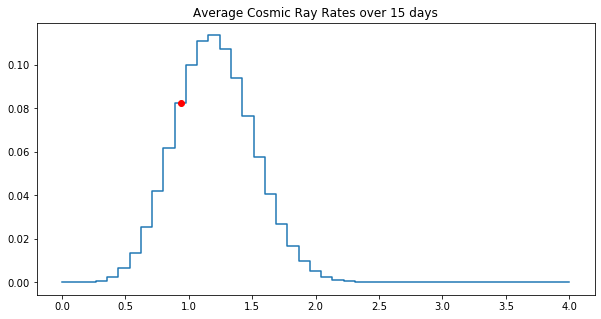


Sigma:
0.7479459605034738


In [410]:
fig3, ax1 = plt.subplots(1,1,figsize=(10,5))

# Analytic:
# prob of 5 sigma
# ppf of 1- prob/trials
# 1 - cdf of ppf

# Numerical:
xlin = np.arange(stats.poisson.ppf(0.01, 1),
              stats.poisson.ppf(0.99, 1))
out = stats.poisson.pmf(xlin, 1)
out = out/np.sum(out)
in2 = out
for n in range(0,14):
    out = signal.fftconvolve(out, in2)
print(out)
ax1.step(np.linspace(stats.poisson.ppf(0.01, 1), stats.poisson.ppf(0.99, 1), len(out)), out)
ax1.set_title("Average Cosmic Ray Rates over 15 days")
ax1.plot(0.94,0.0825,'ro')
step = (0.99-0.01)/len(out)
plt.show()

# Integral of convolution
sum = 0
for n in range(0,12):
    sum += (draw[n]*step)

print("\nSigma:")
print(1-stats.norm.ppf(sum, 1))


    
# Normal of convolution
# plt.plot(np.linspace(0, 1, len(out)), stats.norm.pdf(out, 1))

# draw = np.random.choice(np.linspace(0,3,len(out)), 1000, p=np.abs(out))
# plt.hist(draw, 23);
# print(np.mean(draw), np.std(draw))
# print(stats.norm.ppf(0.111159, 1))

Since the smaller the cosmic ray rate is, the higher the certainty of a moon, the significance is measured on an interval fro 0 to 1(mean) i.e. the closer the rate is to 0, the more significant. With a sigma of 0.75, the measurement is not significant enough to be considered a moon. The cosmic ray rate at which a measurement can be considered significant is 0.544.